In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

Text(0, 0.5, 'feature2')

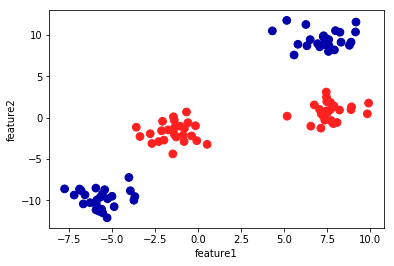

In [19]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

plt.scatter(X[:, 0], X[:,1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel('feature1')
plt.ylabel('feature2')

A linear model for classification can only separate points using a line, and will not be
able to do a very good job on this dataset:

c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature2')

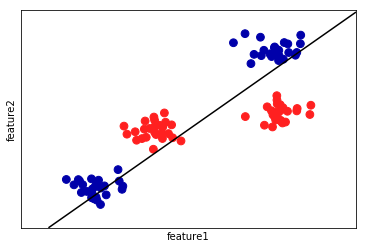

In [20]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel('feature1')
plt.ylabel('feature2')



Text(0.5, 0, 'feature1 ** 2')

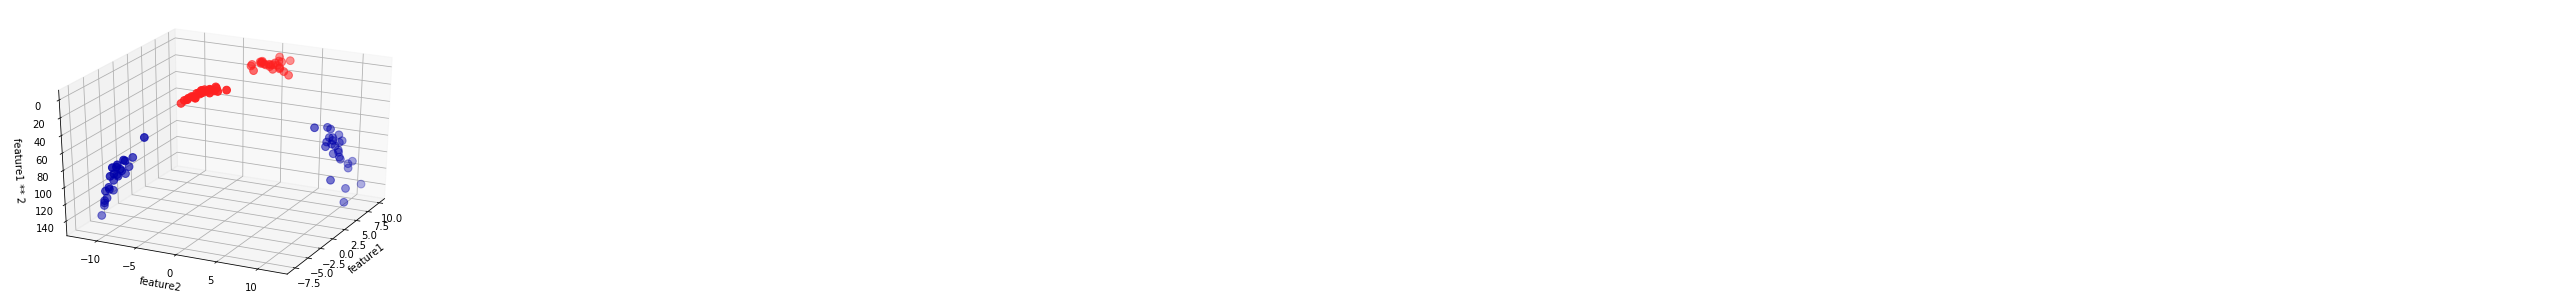

In [22]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()


# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

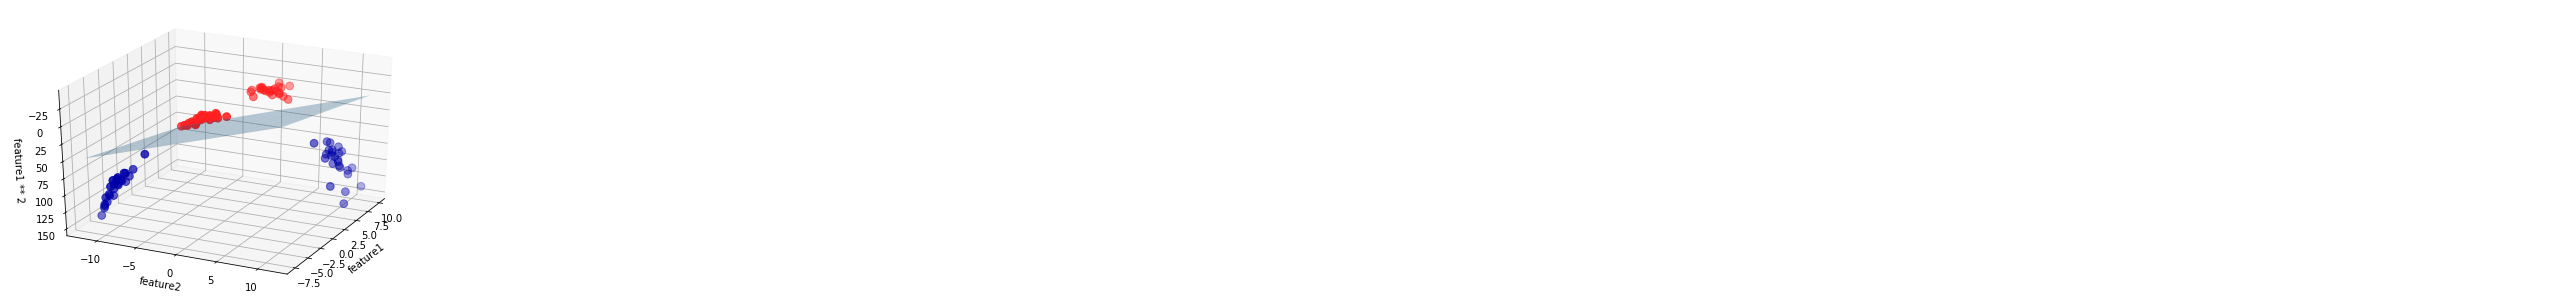

In [37]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")


Text(0, 0.5, 'feature2')

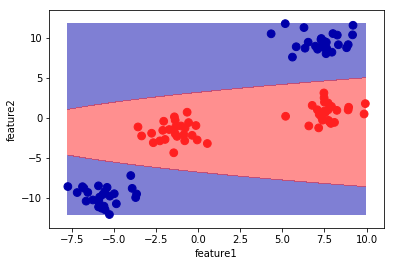

In [52]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")